In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import re

from bs4 import BeautifulSoup
import requests
import os
import json

from sklearn.model_selection import train_test_split
import sklearn.model_selection

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.model_selection
from scipy import stats

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.datasets import load_breast_cancer

import prepare as prep
import explore as ex

In [2]:
#df = pd.read_csv('almost_there.csv', index_col=0)

In [3]:
#df = df.reset_index()

In [4]:
#df.nunique()

In [5]:
#df['title'].value_counts()

In [6]:
#df = df.drop_duplicates(subset='title')

In [7]:
#df

In [8]:
#df = df.drop(columns='book_tag')

In [9]:
#def get_data():
#    '''
#    Will pull the current data from the 'almost_there' csv file, and prep it for deeper cleaning.
#    '''
#    df = pd.read_csv('almost_there.csv', index_col=0)
#    df = df.drop_duplicates(subset='title')
    
#    save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']
#    sub = df[df['length'].isna()]
#    sub1 = sub[sub['title'].isin(save)]
#    df = df.dropna(subset='length')
#    df = pd.concat([df, sub1], axis=0)
    
#    df = df.dropna(subset='summary')
#    df = df.dropna(subset='year_published')
    
#    df = df.reset_index()
#    df = df.drop(columns=['index', 'book_tag'])
    
#    df['summary'] = df['summary'].astype('string')
#    df['title'] = df['title'].astype('string')
#    df['author'] = df['author'].astype('string')
#    df['genre'] = df['genre'].astype('string')
#    df['length'] = df['length'].astype('float')

#    return df

In [10]:
df = prep.get_data('all_books.csv')

In [11]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[]
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[]
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[]
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[]
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[]
...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[]
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[]
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN


In [12]:
df.isna().sum()

title                   0
summary                 0
year_published          0
author                  0
review_count            0
number_of_ratings       0
length                  0
genre                   0
rating                  0
reviews              2050
dtype: int64

In [13]:
df.dtypes

title                 object
summary               object
year_published        object
author                object
review_count           int64
number_of_ratings      int64
length               float64
genre                 object
rating               float64
reviews               object
dtype: object

In [14]:
#df = df.dropna(subset='summary')

In [15]:
#df[df['year_published'].isna()]

In [16]:
#df = df.dropna(subset='year_published')

In [17]:
prep.clean_article(df, 'title')

In [18]:
prep.clean_article(df, 'summary')

In [19]:
df.dtypes

title                 object
summary               object
year_published        object
author                object
review_count           int64
number_of_ratings      int64
length               float64
genre                 object
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
dtype: object

In [20]:
#df = df.drop(columns='clean_titles')

In [21]:
df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)

In [22]:
prep.clean_article(df1, 'Book')

In [23]:
ser = df1['cleaned_Book']

In [24]:
prep.creat_tar(df, ser)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[],"the monuments men allied heroes, nazi thieves,...",at the same time adolf hitler was attempting t...,False
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[],the next person you meet in heaven,in this enchanting sequel to the number one be...,False
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN,the oldest dance,as one of the war heroes searches the oldest l...,False
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN,the plague of doves,the unsolved murder of a farm family still hau...,False


In [25]:
#save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']

In [26]:
#sub = df[df['length'].isna()]

In [27]:
#sub1 = sub[sub['title'].isin(save)]

In [28]:
#df = df.dropna(subset='length')

In [29]:
#df = pd.concat([df, sub1], axis=0)

In [30]:
df.dtypes

title                 object
summary               object
year_published        object
author                object
review_count           int64
number_of_ratings      int64
length               float64
genre                 object
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
successful              bool
dtype: object

In [31]:
df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)

In [32]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False,aboard staten island ferry tourist come across...
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False,owen organizer montgomery clan run family cons...
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False,settle flight australia lucy find text message...
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[],"the monuments men allied heroes, nazi thieves,...",at the same time adolf hitler was attempting t...,False,time adolf hitler attempt take western world a...
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[],the next person you meet in heaven,in this enchanting sequel to the number one be...,False,enchant sequel number five people meet heaven ...
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN,the oldest dance,as one of the war heroes searches the oldest l...,False,war hero search oldest language ancient art da...
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN,the plague of doves,the unsolved murder of a farm family still hau...,False,unsolved murder farm family still haunt white ...


In [33]:
df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)

In [34]:
df.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False,aboard staten island ferry tourist come across...,0.185,0.804,0.011,-0.9534
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False,owen organizer montgomery clan run family cons...,0.019,0.875,0.106,0.9388
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,0.9811
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False,settle flight australia lucy find text message...,0.068,0.679,0.253,0.9861
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,-0.1779


In [35]:
df['sentiment'] = df['compound'].apply(prep.get_sentiment)

In [36]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False,aboard staten island ferry tourist come across...,0.185,0.804,0.011,-0.9534,very negative
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False,owen organizer montgomery clan run family cons...,0.019,0.875,0.106,0.9388,very positive
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,0.9811,very positive
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False,settle flight australia lucy find text message...,0.068,0.679,0.253,0.9861,very positive
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,-0.1779,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[],"the monuments men allied heroes, nazi thieves,...",at the same time adolf hitler was attempting t...,False,time adolf hitler attempt take western world a...,0.090,0.767,0.143,0.7597,very positive
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[],the next person you meet in heaven,in this enchanting sequel to the number one be...,False,enchant sequel number five people meet heaven ...,0.070,0.772,0.158,0.9706,very positive
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN,the oldest dance,as one of the war heroes searches the oldest l...,False,war hero search oldest language ancient art da...,0.079,0.801,0.120,0.8831,very positive
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN,the plague of doves,the unsolved murder of a farm family still hau...,False,unsolved murder farm family still haunt white ...,0.140,0.743,0.117,-0.4939,negative


# exploration

In [37]:
#def prep_data(filename):
    
#    df = prep.get_data(filename)
    
#    prep.clean_article(df, 'title')
#    prep.clean_article(df, 'summary')
    
#    df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)
#    prep.clean_article(df1, 'Book')
#    ser = df1['cleaned_Book']
    
#    prep.creat_tar(df, ser)
    
#    df.loc[[3806], ['length']] = 320
#    df.loc[[3807], ['length']] = 407
#    df.loc[[3808], ['length']] = 368
#    df.loc[[3809], ['length']] = 920
    
#    df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)
#    df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)
#    df['sentiment'] = df['compound'].apply(prep.get_sentiment)
    
#    return df
    

In [38]:
df = prep.prep_data('all_books.csv')

In [39]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False,aboard staten island ferry tourist come across...,0.185,0.804,0.011,-0.9534,very negative
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False,owen organizer montgomery clan run family cons...,0.019,0.875,0.106,0.9388,very positive
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,0.9811,very positive
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False,settle flight australia lucy find text message...,0.068,0.679,0.253,0.9861,very positive
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,-0.1779,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[],"the monuments men allied heroes, nazi thieves,...",at the same time adolf hitler was attempting t...,False,time adolf hitler attempt take western world a...,0.090,0.767,0.143,0.7597,very positive
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[],the next person you meet in heaven,in this enchanting sequel to the number one be...,False,enchant sequel number five people meet heaven ...,0.070,0.772,0.158,0.9706,very positive
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN,the oldest dance,as one of the war heroes searches the oldest l...,False,war hero search oldest language ancient art da...,0.079,0.801,0.120,0.8831,very positive
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN,the plague of doves,the unsolved murder of a farm family still hau...,False,unsolved murder farm family still haunt white ...,0.140,0.743,0.117,-0.4939,negative


In [40]:
# genre_counts = df['genre'].value_counts()

In [41]:
# df['genre'].value_counts()

In [42]:
# genre_counts

In [43]:
# df['target'].value_counts()

In [44]:
# genres_to_remove = genre_counts[genre_counts < 8].index
# remove the rows with those genres "filtering"
# df = df[~df['genre'].isin(genres_to_remove)]

In [45]:
#df.loc[[3806], ['length']] = 320

In [46]:
#df.loc[[3807], ['length']] = 407

In [47]:
#df.loc[[3808], ['length']] = 368

In [48]:
#df.loc[[3809], ['length']] = 920

In [49]:
#df.replace({'No': 0, 'Yes': 1}, inplace=True)

In [50]:
#df['successful'] = df['successful'].astype(bool)

In [51]:
df.isna().sum()

title                    0
summary                  0
year_published           0
author                   0
review_count             0
number_of_ratings        0
length                   0
genre                    0
rating                   0
reviews               1969
cleaned_title            0
cleaned_summary          0
successful               0
lemmatized_summary       0
neg                      0
neutral                  0
pos                      0
compound                 0
sentiment                0
dtype: int64

In [52]:
def split(df):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['successful'])
    return train, test

In [53]:
train, test = split(df)

In [54]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
1976,Pigs in Heaven,"Mother and adopted daughter, Taylor and Turtle...",1993,Barbara Kingsolver,2420,59600,343.0,Fiction,3.98,[],pigs in heaven,"mother and adopted daughter, taylor and turtle...",False,mother adopt daughter taylor turtle greer back...,0.086,0.830,0.083,-0.1280,negative
2469,Lost in the Never Woods,When children go missing in the small coastal ...,2021,Aiden Thomas,3072,12584,384.0,Fantasy,3.73,[],lost in the never woods,when children go missing in the small coastal ...,False,child go miss small coastal town astoria peopl...,0.144,0.825,0.031,-0.9186,very negative
2409,Never Judge a Lady by Her Cover,"She is the most powerful woman in Britain, A q...",2014,Sarah MacLean,1853,19892,376.0,Historical Romance,3.96,[],never judge a lady by her cover,"she is the most powerful woman in britain, a q...",False,powerful woman britain queen london underworld...,0.183,0.738,0.080,-0.9782,very negative
542,Is Everyone Hanging Out Without Me?,Mindy Kaling has lived many lives: the obedien...,2011,Mindy Kaling,23766,478097,222.0,Nonfiction,3.86,NaN,is everyone hanging out without me,mindy kaling has lived many lives the obedient...,False,mindy kaling live many life obedient child imm...,0.036,0.835,0.129,0.9581,very positive
3044,The Hangman's Daughter,"Magdalena, the clever and headstrong daughter ...",2008,Oliver Pötzsch,6528,76556,448.0,Historical Fiction,3.74,NaN,the hangman's daughter,"magdalena, the clever and headstrong daughter ...",False,magdalena clever headstrong daughter bavarian ...,0.190,0.710,0.100,-0.9777,very negative


In [55]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

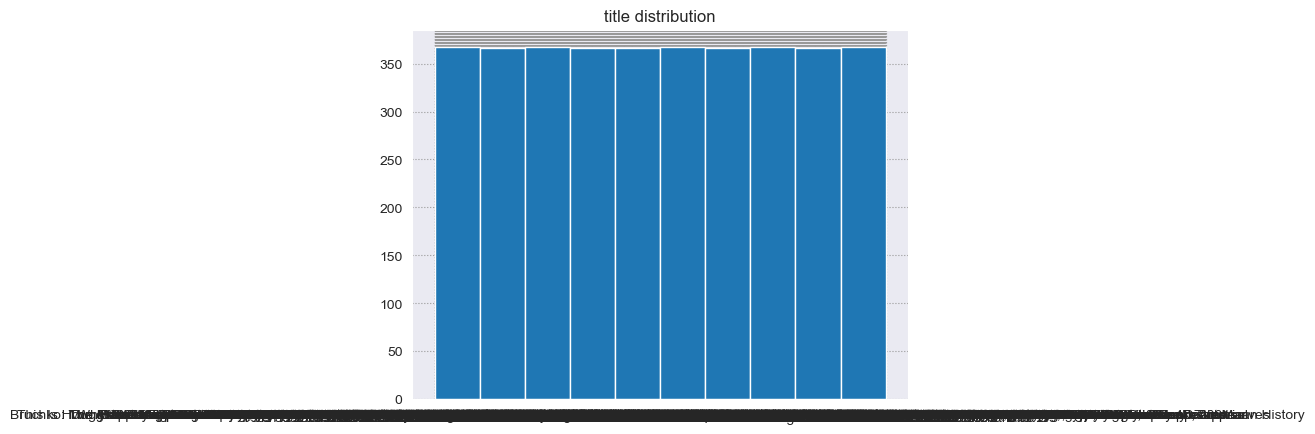

/Users/shawnbrown/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
The "Mightiest" of Earth's Mightiest Heroes is back! Ace pilot. Legendary Avenger. One hundred percent pure bad-@$$. Carol Danvers has a new name, a new mission - and all the power she needs to make her own life a living hell. As the new Captain Marvel, Carol is forging from a challenge from her past! It's a firefight in the sky as the Banshee Squadron debut - but who are the Prowlers, and where has Carol seen them before? And how does secret NASA training program Mercury 13 fit in? Witness Captain Marvel in blazing battlefield action that just may change the course of history! Avengers Time Travel Protocols: engage! Collecting: Captain Marvel 1-6
                                                                                                                 ^
Expected end of text, found '$'  (at char 113), (line:1, col:114)

<Figure size 640x480 with 1 Axes>

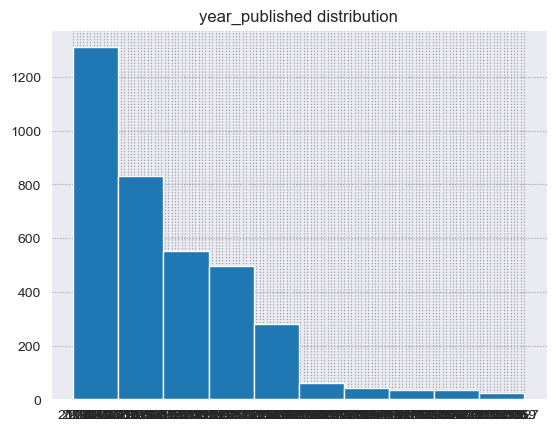

KeyboardInterrupt: 

In [56]:
for col in train.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [57]:
train.dtypes

title                  object
summary                object
year_published         object
author                 object
review_count            int64
number_of_ratings       int64
length                float64
genre                  object
rating                float64
reviews                object
cleaned_title          object
cleaned_summary        object
successful               bool
lemmatized_summary     object
neg                   float64
neutral               float64
pos                   float64
compound              float64
sentiment              object
dtype: object

In [58]:
genre_counts = df['genre'].value_counts()

In [59]:
genres = genre_counts.head(13)

In [60]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
1976,Pigs in Heaven,"Mother and adopted daughter, Taylor and Turtle...",1993,Barbara Kingsolver,2420,59600,343.0,Fiction,3.98,[],pigs in heaven,"mother and adopted daughter, taylor and turtle...",False,mother adopt daughter taylor turtle greer back...,0.086,0.830,0.083,-0.1280,negative
2469,Lost in the Never Woods,When children go missing in the small coastal ...,2021,Aiden Thomas,3072,12584,384.0,Fantasy,3.73,[],lost in the never woods,when children go missing in the small coastal ...,False,child go miss small coastal town astoria peopl...,0.144,0.825,0.031,-0.9186,very negative
2409,Never Judge a Lady by Her Cover,"She is the most powerful woman in Britain, A q...",2014,Sarah MacLean,1853,19892,376.0,Historical Romance,3.96,[],never judge a lady by her cover,"she is the most powerful woman in britain, a q...",False,powerful woman britain queen london underworld...,0.183,0.738,0.080,-0.9782,very negative
542,Is Everyone Hanging Out Without Me?,Mindy Kaling has lived many lives: the obedien...,2011,Mindy Kaling,23766,478097,222.0,Nonfiction,3.86,NaN,is everyone hanging out without me,mindy kaling has lived many lives the obedient...,False,mindy kaling live many life obedient child imm...,0.036,0.835,0.129,0.9581,very positive
3044,The Hangman's Daughter,"Magdalena, the clever and headstrong daughter ...",2008,Oliver Pötzsch,6528,76556,448.0,Historical Fiction,3.74,NaN,the hangman's daughter,"magdalena, the clever and headstrong daughter ...",False,magdalena clever headstrong daughter bavarian ...,0.190,0.710,0.100,-0.9777,very negative


In [61]:
df.dtypes

title                  object
summary                object
year_published         object
author                 object
review_count            int64
number_of_ratings       int64
length                float64
genre                  object
rating                float64
reviews                object
cleaned_title          object
cleaned_summary        object
successful               bool
lemmatized_summary     object
neg                   float64
neutral               float64
pos                   float64
compound              float64
sentiment              object
dtype: object

In [62]:
unsuccessful = train[train['successful'] == False]
successful = train[train['successful'] == True]

In [63]:
successful['length'].min(), successful['length'].mean(), successful['length'].max()

(198.0, 472.37007874015745, 1237.0)

In [64]:
unsuccessful['length'].min(), unsuccessful['length'].mean(), unsuccessful['length'].max()

(24.0, 355.3657754010695, 4211.0)

In [65]:
# Rotating X-axis labels
# plt.xticks(rotation = 25)

In [66]:
def pearsonr_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform a pearsonr test on them and print out 
    the test statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    corr, p = stats.pearsonr(group1, group2)

    alpha = .05
    seed = 42

    print(f'Correlation = {corr:.4f}') 
    print(f'p-value     = {p}')

    print('Is p-value < alpha?', p < alpha)

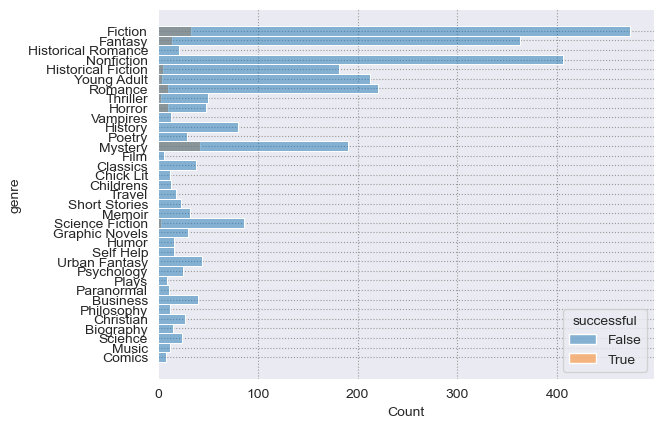

In [67]:
sns.histplot(data=train, y='genre', hue='successful')
#plt.xticks(rotation = 80)
plt.show()

In [83]:
top_ten = train['genre'].value_counts().head(10)

In [91]:
top_ten

Fiction               506
Nonfiction            406
Fantasy               377
Mystery               232
Romance               231
Young Adult           217
Historical Fiction    186
Science Fiction        89
History                80
Horror                 58
Name: genre, dtype: int64

Text(0.5, 0, '# Occurances')

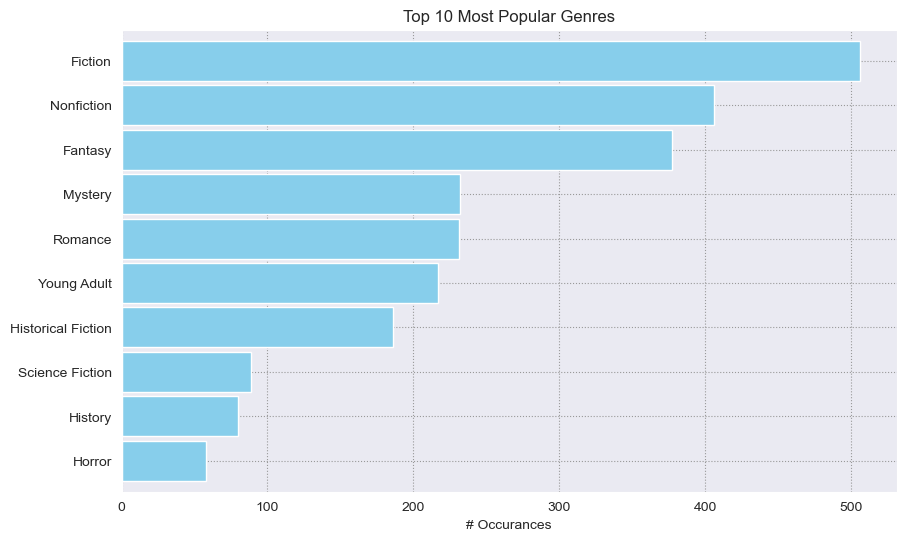

In [89]:
top_ten.sort_values().plot.barh(color='skyblue', width=.9, figsize=(10, 6))

plt.title('Top 10 Most Popular Genres')
plt.ylabel('')
plt.xlabel('# Occurances')

# make the labels pretty
#ticks, _ = plt.yticks()
#labels = top_ten.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
#_ = plt.yticks(ticks, labels)


In [68]:
#plt.barplot

<AxesSubplot:xlabel='compound', ylabel='sentiment'>

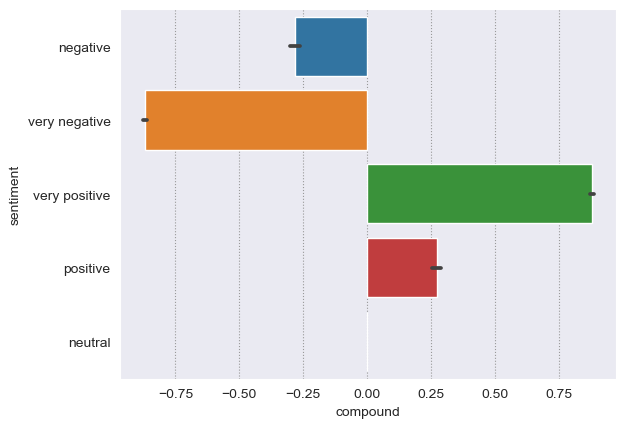

In [69]:
sns.barplot(x ='compound',y='sentiment', data = train)

In [70]:
top_authors = train['author'].value_counts().head(10).index.tolist()

top_authors

['J.D. Robb',
 'Stephen King',
 'Louise Penny',
 'Rick Riordan',
 'Terry Pratchett',
 'Kelley Armstrong',
 'Charlaine Harris',
 'Cassandra Clare',
 'Cora Reilly',
 'Bill Bryson']

In [71]:
filtered_df = train[train['author'].isin(top_authors)]

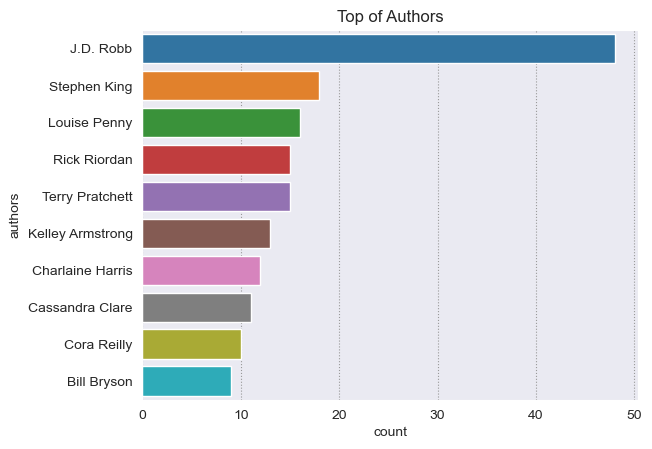

In [72]:
# Construct plot
sns.countplot(y='author', data=filtered_df, order=filtered_df['author'].value_counts().index)

plt.title('Top of Authors')
plt.ylabel('Appearances on List')
plt.ylabel('authors')
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

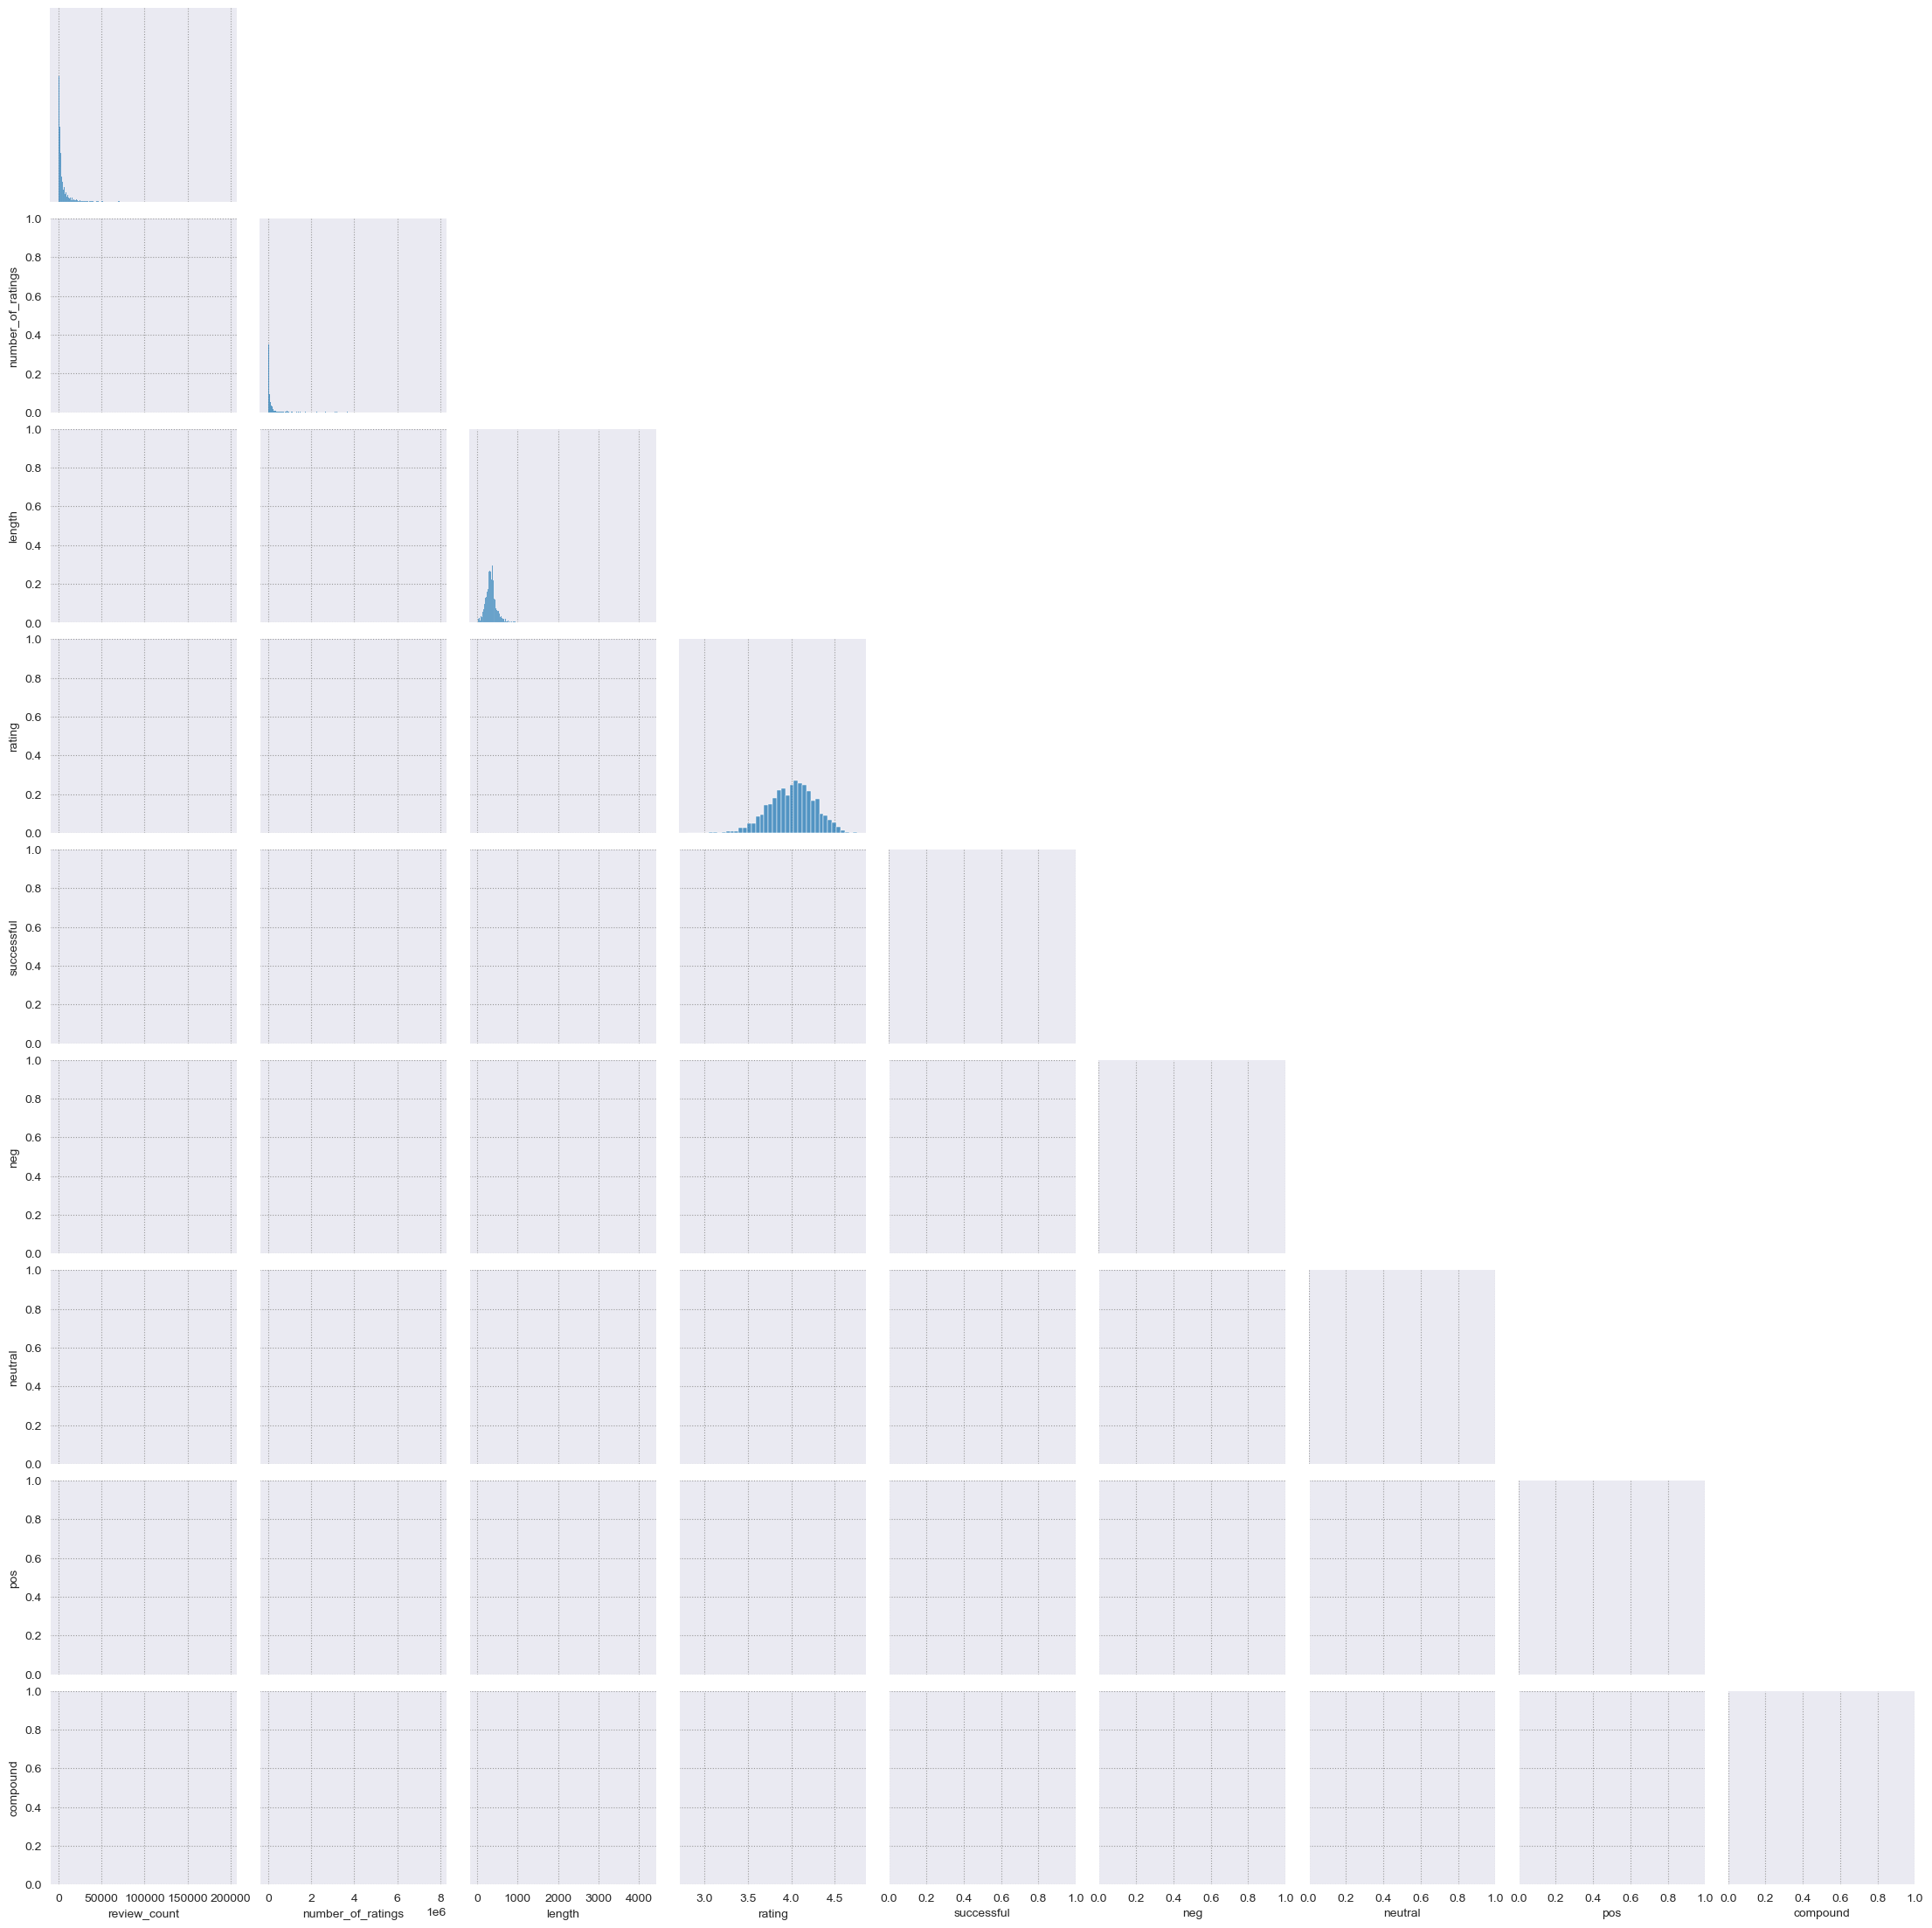

In [73]:
sns.pairplot(data=train, corner=True)

## What is the relationship between summary sentiment score and book length, between sentiment score and year_published ?

In [92]:
train.head(1)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
1976,Pigs in Heaven,"Mother and adopted daughter, Taylor and Turtle...",1993,Barbara Kingsolver,2420,59600,343.0,Fiction,3.98,[],pigs in heaven,"mother and adopted daughter, taylor and turtle...",False,mother adopt daughter taylor turtle greer back...,0.086,0.83,0.083,-0.128,negative


In [93]:
train[['compound', 'length']]

,compound,length
1976,-0.1280,343.0
2469,-0.9186,384.0
2409,-0.9782,376.0
542,0.9581,222.0
3044,-0.9777,448.0
...,...,...
552,0.8402,224.0
1300,0.9744,298.0
691,-0.3321,240.0
3031,0.5967,448.0


In [94]:
def sent_vs_len(train):

    sns.scatterplot(data=train, x='length', y='compound', hue='successful')

    plt.title('Comparing Book Length to the Compound Sentiment Score')
    plt.xlabel('Book Length')
    plt.ylabel('Sentiment Score')
    plt.show()

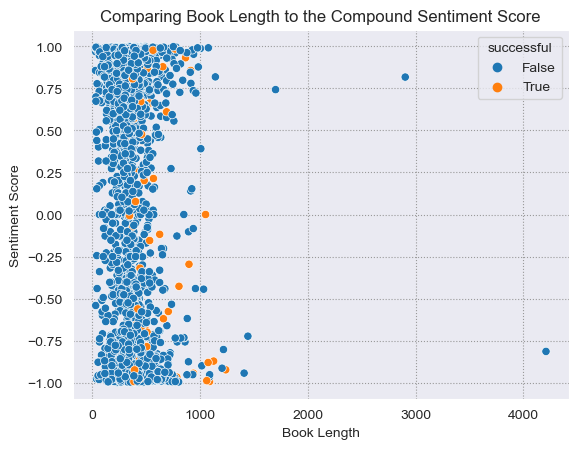

In [95]:
sent_vs_len(train)

In [96]:
pearsonr_report(train['compound'], train['length'])

Correlation = -0.1126
p-value     = 9.867649453698676e-10
Is p-value < alpha? True


In [99]:
pearsonr_report(train['compound'], train['successful'])

Correlation = -0.0869
p-value     = 2.462797684292394e-06
Is p-value < alpha? True


In [101]:
pearsonr_report(train['neg'], train['successful'])

Correlation = 0.0759
p-value     = 3.8827179359750596e-05
Is p-value < alpha? True


In [102]:
pearsonr_report(train['pos'], train['successful'])

Correlation = -0.0601
p-value     = 0.001132611864755768
Is p-value < alpha? True


In [103]:
pearsonr_report(train['neutral'], train['successful'])

Correlation = -0.0151
p-value     = 0.4134718197976674
Is p-value < alpha? False


## testing cross validation

In [ ]:
data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

In [ ]:
y

In [ ]:
# with kfold

k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

In [ ]:
data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

In [ ]:
def uni_id_best_seller(train):

    best = train[train['successful'] == True] 
    unsuccessful = train[train['successful'] == False] 

    best_words = pd.Series(' '.join(best.lemmatized_summary).split(' ')).value_counts()
    unsuccessful_words = pd.Series(' '.join(unsuccessful.lemmatized_summary).split(' ')).value_counts()
    all_words = pd.Series(' '.join(train.lemmatized_summary).split(' ')).value_counts()
    
    word_counts = (pd.concat([all_words, best_words, unsuccessful_words], axis=1, sort=True)
                .set_axis(['all', 'best', 'unsuccessful'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
    
    all_words_show = word_counts.sort_values(by='all', ascending=False).head(10)
    
    # figure out the percentage of spam vs ham
    print((word_counts
     .assign(p_unsuccessful = word_counts.unsuccessful / word_counts['all'],
         p_best = word_counts.best / word_counts['all'])
     .sort_values(by='all')
     [['p_unsuccessful', 'p_best']]
     .tail(10)
     .sort_values('p_best')
     .plot.barh(stacked=True),
           
     plt.title('Common Words in Positively Aligned Summaries'),
     plt.xlabel('Probability of Appearing'),
     plt.ylabel('Word'),
     plt.legend(title='Successful Book', loc = 'upper right', labels=['No', 'Yes']))

     )
    return best 

In [ ]:
meh = uni_id_best_seller(train)

In [ ]:
train